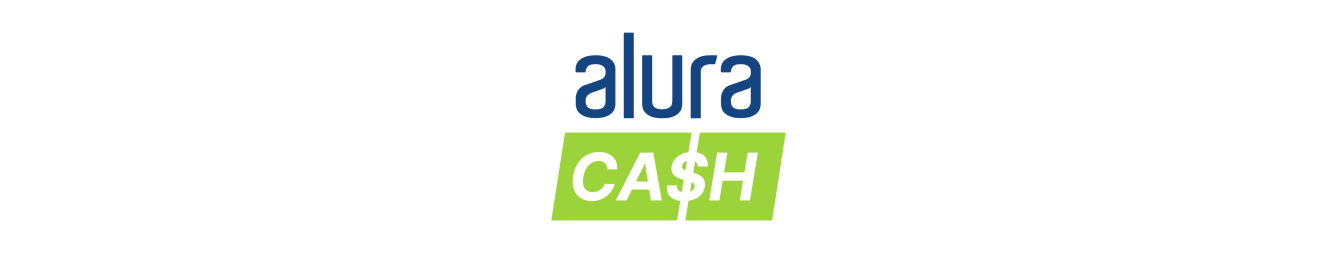

Somos uma equipe de dados que foi contratada para fazer parte do banco digital internacional chamado Alura Cash. No primeiro dia, a diretoria financeira nos convocou para uma reunião para informar que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos.

Por conta disso, foi solicitada uma solução para diminuir as perdas financeiras geradas por pessoas mutuárias que não quitam suas dívidas. Nos foi informado também que teríamos o prazo de um mês para encontrar essa solução e apresentá-la à diretoria financeira. Sendo assim, solicitamos um conjunto de dados contendo as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuária é inadimplente ou não.

### Semana 1
A semana 1 é dedicada à análise e estruturação dos dados oferecidos pelo banco com MySQL. Primeiro, foi notado que os dados estavam diferentes dos usuais, pois sua fonte era um dump, o que nos exigiu uma atenção especial na manipulação deles. Assim, buscamos ler todo o registro para entender nossos dados. Notamos que os valores estavam divididos por tabelas características, com valores de ID referenciando os dados de cada cliente.

Então, iniciamos analisando as informações que o conjunto de dados possuía. Observamos que os dados estavam em inglês, os valores de texto estavam sem padronização, além de vários valores nulos.

Foi percebida também a existência de uma tabela que continha a relação de todos os IDs de uma mesma pessoa cliente do Alura Cash. Dessa forma, o primeiro passo foi tratar nossos dados para deixá-los padronizados no texto, bem como, corrigir inconsistências relacionadas ao tipo e estruturação deles.

Depois buscamos unir as tabelas pelos valores de IDs que eram correspondentes entre si, deixando todos os dados em uma única tabela de dados de clientes. Após uma conversa entre a equipe, decidimos não eliminar os valores nulos dentro do banco de dados, pois poderiam conter informações de clientes que são importantes para o banco.

A tabela de dados unidos foi exportada do MySQL como csv e será utilizada nas próximas semanas.

### Sobre o mês do desafio

Você foi contratado(a) como pessoa cientista de dados para trabalhar em um banco digital internacional chamado Alura Cash. Na primeira reunião do seu novo trabalho, a diretoria financeira informa que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos. Portanto, é solicitada uma solução para que seja possível diminuir as perdas financeiras por conta de pessoas mutuarias que não quitam suas dívidas.

Como cientista de dados, você sugere um estudo das informações financeiras e de solicitação de empréstimo para encontrar padrões que possam indicar uma possível inadimplência.

Desse modo, você solicita um conjunto de dados que contenha as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuaria é inadimplente ou não. Com esses dados, você sabe que consegue modelar um classificador capaz de encontrar potenciais clientes inadimplentes e solucionar o problema do Alura Cash.

## Dicionário de dados por tabela

### dados_mutuarios

Tabela contendo os dados pessoais de cada solicitante

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
| `person_age` | Idade da pessoa - em anos - que solicita empréstimo |
| `person_income` | Salário anual da pessoa solicitante |
| `person_home_ownership` | Situação da propriedade que a pessoa possui: *Alugada* (`Rent`), *Própria* (`Own`), *Hipotecada* (`Mortgage`) e *Outros casos* (`Other`) |
| `person_emp_length` | Tempo - em anos - que a pessoa trabalhou |

### emprestimos

Tabela contendo as informações do empréstimo solicitado

| Feature | Característica |
| --- | --- |
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
| `loan_intent` | Motivo do empréstimo: *Pessoal* (`Personal`), *Educativo* (`Education`), *Médico* (`Medical`), *Empreendimento* (`Venture`), *Melhora do lar* (`Homeimprovement`), *Pagamento de débitos* (`Debtconsolidation`) |
| `loan_grade` | Pontuação de empréstimos, por nível variando de `A` a `G` |
| `loan_amnt` | Valor total do empréstimo solicitado |
| `loan_int_rate` | Taxa de juros |
| `loan_status` | Possibilidade de inadimplência |
| `loan_percent_income` | Renda percentual entre o *valor total do empréstimo* e o *salário anual* |


### historicos_banco

Histório de emprétimos de cada cliente

| Feature | Característica |
| --- | --- |
|`cb_id`|ID do histórico de cada solicitante|
| `cb_person_default_on_file` | Indica se a pessoa já foi inadimplente: sim (`Y`,`YES`) e não (`N`,`NO`) |
| `cb_person_cred_hist_length` | Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito |

### id

Tabela que relaciona os IDs de cada informação da pessoa solicitante

| Feature | Característica |
| --- | --- |
|`person_id`|ID da pessoa solicitante|
|`loan_id`|ID da solicitação de empréstico de cada solicitante|
|`cb_id`|ID do histórico de cada solicitante|

In [1]:
import pandas as pd
import numpy as np

In [2]:
person_id = pd.read_csv('person_id.csv')
person_id.head()

,person_id,person_age,person_income,person_home_ownership,person_emp_length,person_id.1,loan_id,cb_id
0,tad8vkTn-vp4l,33.0,48000.0,Rent,17.0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus
1,pNnqq0Ql-mXDg,22.0,51000.0,Rent,6.0,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ
2,WvikzddB-Fzo8,23.0,85000.0,Rent,2.0,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3
3,wQjd4F7u-P45x,26.0,86004.0,Rent,0.0,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz
4,qlWL5n7v-00z9,27.0,50000.0,Rent,5.0,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC


In [3]:
loan_id = pd.read_csv('loan_id.csv')
loan_id.head()

,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_id,loan_id.1,cb_id
0,xFgOFTuY-3UOf,Debtconsolidation,A,10000.0,6.62,0.0,0.20,ol1UhgJG-Ij8s,xFgOFTuY-3UOf,m04ZQw3E-d0pp
1,MjTNYsmN-6qBc,Debtconsolidation,C,25000.0,12.73,0.0,0.29,CZWcNgWA-kbk4,MjTNYsmN-6qBc,FxGG9RvP-Le3z
2,gp7W8s0h-4AkX,Education,A,8500.0,6.54,0.0,0.17,nf2cYR8g-MgSp,gp7W8s0h-4AkX,9MX3jpeX-FNdL
3,j06x2SYk-I5XL,Homeimprovement,C,15000.0,12.53,0.0,0.12,UEUPY5Ek-pj9X,j06x2SYk-I5XL,LmAWWoqo-c9w7
4,IzAKBBp8-4hek,Personal,A,7200.0,7.51,0.0,0.30,q7p8al6p-kovf,IzAKBBp8-4hek,8kFbSpx8-Ca6l


In [4]:
cb_id = pd.read_csv('cb_id.csv')
cb_id.head()

,cb_id,cb_person_default_on_file,cb_person_cred_hist_length,person_id,loan_id,cb_id.1
0,dDoO2g97-yxWH,N,2,bLi18O5K-31eI,HpY5JrYs-x2bv,dDoO2g97-yxWH
1,tnMfN0C9-fLm4,N,3,pyds3XGU-7RRS,ISD4mFw4-GnYT,tnMfN0C9-fLm4
2,2bLyWdhh-Nc4i,Y,2,IBHc9bNo-muIb,jSmQJckJ-sz2g,2bLyWdhh-Nc4i
3,mCZ437B8-XUMx,N,4,qGi9BLxD-1KQM,iv3ufRwM-Fppi,mCZ437B8-XUMx
4,8SelGHyw-9ksb,N,5,g4JfbgOc-WHOB,8Qhsx0cn-hx45,8SelGHyw-9ksb


In [5]:
person_id_loan_id = person_id.merge(loan_id, left_on='loan_id', right_on='loan_id.1')
person_id_loan_id.head()

,person_id_x,person_age,person_income,person_home_ownership,person_emp_length,person_id.1,loan_id_x,cb_id_x,loan_id_y,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_id_y,loan_id.1,cb_id_y
0,tad8vkTn-vp4l,33.0,48000.0,Rent,17.0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,TOt8c6L6-s7ik,Debtconsolidation,B,3500.0,11.86,0.0,0.07,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus
1,pNnqq0Ql-mXDg,22.0,51000.0,Rent,6.0,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,c3aDZaHQ-Yz61,Personal,A,7500.0,5.99,0.0,0.15,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ
2,WvikzddB-Fzo8,23.0,85000.0,Rent,2.0,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,NRNKsI3j-vy1N,Medical,B,9600.0,10.99,0.0,0.11,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3
3,wQjd4F7u-P45x,26.0,86004.0,Rent,0.0,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,Is7djrQj-6wB4,Education,C,12000.0,12.99,0.0,0.14,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz
4,qlWL5n7v-00z9,27.0,50000.0,Rent,5.0,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,M4zrvEh2-v0UC,Venture,B,12000.0,10.37,0.0,0.24,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC


In [6]:
person_id_loan_id_cb_id = person_id_loan_id.merge(cb_id, left_on='cb_id_x', right_on='cb_id')
person_id_loan_id_cb_id.head()

,person_id_x,person_age,person_income,person_home_ownership,person_emp_length,person_id.1,loan_id_x,cb_id_x,loan_id_y,loan_intent,...,loan_percent_income,person_id_y,loan_id.1,cb_id_y,cb_id,cb_person_default_on_file,cb_person_cred_hist_length,person_id,loan_id,cb_id.1
0,tad8vkTn-vp4l,33.0,48000.0,Rent,17.0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,TOt8c6L6-s7ik,Debtconsolidation,...,0.07,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,RrDGKyTj-Klus,N,10,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus
1,pNnqq0Ql-mXDg,22.0,51000.0,Rent,6.0,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,c3aDZaHQ-Yz61,Personal,...,0.15,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,jgLTv4dz-RrbJ,N,2,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ
2,WvikzddB-Fzo8,23.0,85000.0,Rent,2.0,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,NRNKsI3j-vy1N,Medical,...,0.11,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,qMi6xZcZ-7pv3,N,4,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3
3,wQjd4F7u-P45x,26.0,86004.0,Rent,0.0,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,Is7djrQj-6wB4,Education,...,0.14,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,i8Gd1QLO-WyJz,N,2,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz
4,qlWL5n7v-00z9,27.0,50000.0,Rent,5.0,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,M4zrvEh2-v0UC,Venture,...,0.24,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,w6OC79WL-49ZC,N,9,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC


In [7]:
person_id_loan_id_cb_id.columns

Index(['person_id_x', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'person_id.1', 'loan_id_x', 'cb_id_x', 'loan_id_y',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'person_id_y', 'loan_id.1',
       'cb_id_y', 'cb_id', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_id', 'loan_id', 'cb_id.1'],
      dtype='object')

In [8]:
df = person_id_loan_id_cb_id[['person_id', 'loan_id', 'cb_id', 'person_age', 
                              'person_income', 'person_home_ownership', 
                              'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 
                              'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
                              'cb_person_default_on_file', 'loan_status']]
df

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_status
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,Rent,17.0,Debtconsolidation,B,3500.0,11.86,0.07,10,N,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,Rent,6.0,Personal,A,7500.0,5.99,0.15,2,N,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,Rent,2.0,Medical,B,9600.0,10.99,0.11,4,N,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,Rent,0.0,Education,C,12000.0,12.99,0.14,2,N,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,Rent,5.0,Venture,B,12000.0,10.37,0.24,9,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,vlxk8MY5-7hWa,Xc1B093a-OZOR,tUAH2RvY-efph,30.0,49000.0,Own,3.0,Medical,A,3500.0,6.99,0.07,5,N,0.0
14948,XSPFIfma-XFL1,BPFOaOSh-hafK,qDMRxfoB-Oda0,42.0,110000.0,Mortgage,6.0,Venture,C,10800.0,14.27,0.10,17,N,0.0
14949,MfTB0zqR-rGP1,sDj175Pn-tEpa,PNMDKSpj-q5pU,27.0,36500.0,Rent,4.0,Education,B,12500.0,10.25,0.34,8,N,1.0
14950,6X4TqXNZ-BwP0,YxqNxCaZ-0r7O,oXqsGltU-tJIq,24.0,20856.0,Own,NaN,Venture,B,10000.0,10.59,0.48,4,N,0.0


In [9]:
df.to_csv('dados_sql.csv', index=False)

In [10]:
df1 = pd.read_csv('df1.csv')
df1 = df1.drop(['person_id.1'], axis = 1)
df1.head()

,person_id,person_age,person_income,person_home_ownership,person_emp_length
0,004wNQ39-TsQu,33.0,42000.0,Rent,4.0
1,007o7Z4z-DX1c,24.0,113000.0,Mortgage,5.0
2,00XP05XD-58XF,33.0,63996.0,Rent,4.0
3,01aOoe5m-MKqu,27.0,24000.0,Rent,0.0
4,01Ih63oD-gO7p,24.0,75000.0,Rent,6.0


In [11]:
df2 = pd.read_csv('df2.csv')
df2 = df2.drop(['loan_id.1'], axis = 1)
df2.head()

,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,LOi8hmOp-rTsT,Medical,C,3600.0,12.68,0.0,0.09
1,UDHcjCZ4-PsCF,Education,B,17950.0,11.99,0.0,0.16
2,jxrxgH6w-KjPL,Education,B,3200.0,10.74,0.0,0.05
3,3fRKSr5F-GqEH,Debtconsolidation,C,4000.0,12.87,0.0,0.17
4,FrMoEnPL-XivD,Personal,B,15000.0,11.71,0.0,0.20


In [12]:
df3 = pd.read_csv('df3.csv')
df3 = df3.drop(['cb_id.1'], axis = 1)
df3.head()

,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,ifskDMYQ-tS16,Y,5
1,1d9AQTCy-shub,N,4
2,GUCQvGYe-uuzi,N,9
3,yBuO0TTi-ZPoP,N,10
4,YK0cuXUQ-Udaf,N,4


In [13]:
dados = pd.concat([df1, df2, df3], axis = 1)
dados

,person_id,person_age,person_income,person_home_ownership,person_emp_length,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,004wNQ39-TsQu,33.0,42000.0,Rent,4.0,LOi8hmOp-rTsT,Medical,C,3600.0,12.68,0.0,0.09,ifskDMYQ-tS16,Y,5
1,007o7Z4z-DX1c,24.0,113000.0,Mortgage,5.0,UDHcjCZ4-PsCF,Education,B,17950.0,11.99,0.0,0.16,1d9AQTCy-shub,N,4
2,00XP05XD-58XF,33.0,63996.0,Rent,4.0,jxrxgH6w-KjPL,Education,B,3200.0,10.74,0.0,0.05,GUCQvGYe-uuzi,N,9
3,01aOoe5m-MKqu,27.0,24000.0,Rent,0.0,3fRKSr5F-GqEH,Debtconsolidation,C,4000.0,12.87,0.0,0.17,yBuO0TTi-ZPoP,N,10
4,01Ih63oD-gO7p,24.0,75000.0,Rent,6.0,FrMoEnPL-XivD,Personal,B,15000.0,11.71,0.0,0.20,YK0cuXUQ-Udaf,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,zzRvWtwO-qJSU,33.0,44000.0,Rent,1.0,L8OmjOk1-2kEt,Education,D,7500.0,12.92,1.0,0.17,RDiuYDK0-yisc,Y,6
14948,ZzT6MWGq-NTp5,22.0,57860.0,Mortgage,1.0,noXdFASt-xYmY,Education,C,20000.0,11.41,0.0,0.35,y1DRlGPY-05J3,N,3
14949,ZZUY0Z0e-GalT,25.0,65000.0,Mortgage,3.0,yyYmqYnp-URlg,Homeimprovement,B,1200.0,10.99,0.0,0.02,xA6L3W18-BLKs,N,2
14950,ZzvFD4Y8-MTdZ,28.0,82500.0,Rent,4.0,Je2pxlx1-cLxT,Venture,E,11000.0,16.35,0.0,0.13,YfBhs8aE-Q0H5,N,8


In [14]:
dados_sem_NA = dados.dropna()
dados_sem_NA

,person_id,person_age,person_income,person_home_ownership,person_emp_length,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,004wNQ39-TsQu,33.0,42000.0,Rent,4.0,LOi8hmOp-rTsT,Medical,C,3600.0,12.68,0.0,0.09,ifskDMYQ-tS16,Y,5
1,007o7Z4z-DX1c,24.0,113000.0,Mortgage,5.0,UDHcjCZ4-PsCF,Education,B,17950.0,11.99,0.0,0.16,1d9AQTCy-shub,N,4
2,00XP05XD-58XF,33.0,63996.0,Rent,4.0,jxrxgH6w-KjPL,Education,B,3200.0,10.74,0.0,0.05,GUCQvGYe-uuzi,N,9
3,01aOoe5m-MKqu,27.0,24000.0,Rent,0.0,3fRKSr5F-GqEH,Debtconsolidation,C,4000.0,12.87,0.0,0.17,yBuO0TTi-ZPoP,N,10
4,01Ih63oD-gO7p,24.0,75000.0,Rent,6.0,FrMoEnPL-XivD,Personal,B,15000.0,11.71,0.0,0.20,YK0cuXUQ-Udaf,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,zzRvWtwO-qJSU,33.0,44000.0,Rent,1.0,L8OmjOk1-2kEt,Education,D,7500.0,12.92,1.0,0.17,RDiuYDK0-yisc,Y,6
14948,ZzT6MWGq-NTp5,22.0,57860.0,Mortgage,1.0,noXdFASt-xYmY,Education,C,20000.0,11.41,0.0,0.35,y1DRlGPY-05J3,N,3
14949,ZZUY0Z0e-GalT,25.0,65000.0,Mortgage,3.0,yyYmqYnp-URlg,Homeimprovement,B,1200.0,10.99,0.0,0.02,xA6L3W18-BLKs,N,2
14950,ZzvFD4Y8-MTdZ,28.0,82500.0,Rent,4.0,Je2pxlx1-cLxT,Venture,E,11000.0,16.35,0.0,0.13,YfBhs8aE-Q0H5,N,8


In [15]:
df.isna().sum()

person_id                        0
loan_id                          0
cb_id                            0
person_age                     133
person_income                  143
person_home_ownership          152
person_emp_length              563
loan_intent                    108
loan_grade                     124
loan_amnt                      139
loan_int_rate                 1568
loan_percent_income            140
cb_person_cred_hist_length       0
cb_person_default_on_file      161
loan_status                    157
dtype: int64

In [16]:
df_fill = df.fillna(method="ffill")
df_fill

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_status
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,Rent,17.0,Debtconsolidation,B,3500.0,11.86,0.07,10,N,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,Rent,6.0,Personal,A,7500.0,5.99,0.15,2,N,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,Rent,2.0,Medical,B,9600.0,10.99,0.11,4,N,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,Rent,0.0,Education,C,12000.0,12.99,0.14,2,N,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,Rent,5.0,Venture,B,12000.0,10.37,0.24,9,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,vlxk8MY5-7hWa,Xc1B093a-OZOR,tUAH2RvY-efph,30.0,49000.0,Own,3.0,Medical,A,3500.0,6.99,0.07,5,N,0.0
14948,XSPFIfma-XFL1,BPFOaOSh-hafK,qDMRxfoB-Oda0,42.0,110000.0,Mortgage,6.0,Venture,C,10800.0,14.27,0.10,17,N,0.0
14949,MfTB0zqR-rGP1,sDj175Pn-tEpa,PNMDKSpj-q5pU,27.0,36500.0,Rent,4.0,Education,B,12500.0,10.25,0.34,8,N,1.0
14950,6X4TqXNZ-BwP0,YxqNxCaZ-0r7O,oXqsGltU-tJIq,24.0,20856.0,Own,4.0,Venture,B,10000.0,10.59,0.48,4,N,0.0


In [17]:
df_fill.to_csv('df_fill.csv', index=False)

In [18]:
df_fill.isna().sum()

person_id                     0
loan_id                       0
cb_id                         0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
cb_person_default_on_file     0
loan_status                   0
dtype: int64

In [19]:
df_fill.loan_grade.value_counts()

A    4968
B    4793
C    2964
D    1646
E     438
F     112
G      31
Name: loan_grade, dtype: int64

In [20]:
df_fill.person_home_ownership.value_counts()

Rent        7570
Mortgage    6168
Own         1162
Other         52
Name: person_home_ownership, dtype: int64

In [21]:
df.person_home_ownership.value_counts()

Rent        7502
Mortgage    6092
Own         1154
Other         52
Name: person_home_ownership, dtype: int64

In [22]:
dados_mutuarios = pd.read_csv('dados_mutuarios.csv')
emprestimos = pd.read_csv('emprestimos.csv')
historicos_banco = pd.read_csv('historicos_banco.csv')
dados_totais = pd.concat([dados_mutuarios, emprestimos, historicos_banco], axis = 1)
dados_totais = dados_totais.dropna()
dados_totais

,person_id,person_age,person_income,person_home_ownership,person_emp_length,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,tad8vkTn-vp4l,33.0,48000.0,Rent,17.0,NMgFWFWN-2yGG,Homeimprovement,C,20000.0,13.22,0.0,0.22,ZNWGR0Ap-FDt2,N,9.0
1,dEILQqp2-lgLx,24.0,75000.0,Own,0.0,08Ts3XSa-KkvE,Venture,C,6000.0,13.49,0.0,0.04,wqALDH4x-mnzE,N,7.0
2,Az11sWWw-SdFA,29.0,28800.0,Rent,5.0,xo79pAME-elmp,Personal,A,8000.0,6.17,0.0,0.13,57O09sJw-NBKj,N,6.0
3,YDovEwBH-0eek,23.0,75000.0,Mortgage,7.0,IB6lBS2h-nWhz,Homeimprovement,B,9600.0,10.08,0.0,0.16,pH50QiTJ-0jqz,Y,10.0
4,lNsbfwlP-gzOE,26.0,35000.0,Rent,0.0,CONLtJHn-1yde,Medical,A,6500.0,8.49,0.0,0.30,3voX5CIK-tCxE,N,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34481,hud3DWbC-wchY,31.0,75000.0,Rent,1.0,IgSZgpaN-Y4PU,Venture,A,14000.0,6.92,0.0,0.18,YpgsAA9w-BuMI,N,9.0
34483,8R5N1BwO-9gWy,34.0,135000.0,Rent,6.0,4Dlfc8RJ-k9Nw,Debtconsolidation,B,13000.0,10.62,0.0,0.25,8nsUruwO-NxcW,N,4.0
34484,Aad7RJtK-T7AN,33.0,51888.0,Mortgage,13.0,JwO7nfjn-aA2R,Homeimprovement,A,12000.0,7.88,0.0,0.23,8Wo9b68x-j52a,N,7.0
34487,fC1Kt9FU-9HoO,21.0,30000.0,Rent,5.0,s2yBoSzz-NQfH,Debtconsolidation,E,30600.0,18.79,1.0,0.41,Mv1vByo2-b2wv,N,4.0


In [23]:
trad_col = {'person_id': 'id_cliente', 
            'person_age':'idade_cliente', 
            'person_income': 'salario_cliente', 
            'person_home_ownership': 'tipo_propriedade', 
            'person_emp_length': 'tempo_trabalho', 
            'loan_id': 'id_emprestimo', 
            'loan_intent': 'motivo_emprestimo', 
            'loan_grade': 'pontuacao_emprestimo', 
            'loan_amnt': 'valor_emprestimo', 
            'loan_int_rate': 'taxa_juros', 
            'loan_status': 'POSSIBILIDADE_INADIMPLENCIA', 
            'loan_percent_income': 'salario_emprestimo', 
            'cb_id': 'id_historico', 
            'cb_person_default_on_file': 'INADIMPLENTE', 
            'cb_person_cred_hist_length': 'tempo_como_cliente'}

tipo_prop= {'Rent': 'alugado', 
              'Own': 'proprio', 
              'Mortgage': 'financiado', 
              'Other': 'outro'}
motivo_emprestimo = {'Homeimprovement': 'reforma', 
              'Venture': 'risco', 
              'Personal': 'pessoal', 
              'Medical': 'saude', 
              'Debtconsolidation': 'quitar', 
              'Education': 'ensino'}
inadimplencia = {'N': 0, 'Y': 1}

In [24]:
df = df.rename(columns = trad_col)
dados = dados.rename(columns = trad_col)
dados_sem_NA = dados_sem_NA.rename(columns = trad_col)
df_fill = df_fill.rename(columns = trad_col)

In [25]:
df

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,Rent,17.0,Debtconsolidation,B,3500.0,11.86,0.07,10,N,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,Rent,6.0,Personal,A,7500.0,5.99,0.15,2,N,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,Rent,2.0,Medical,B,9600.0,10.99,0.11,4,N,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,Rent,0.0,Education,C,12000.0,12.99,0.14,2,N,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,Rent,5.0,Venture,B,12000.0,10.37,0.24,9,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,vlxk8MY5-7hWa,Xc1B093a-OZOR,tUAH2RvY-efph,30.0,49000.0,Own,3.0,Medical,A,3500.0,6.99,0.07,5,N,0.0
14948,XSPFIfma-XFL1,BPFOaOSh-hafK,qDMRxfoB-Oda0,42.0,110000.0,Mortgage,6.0,Venture,C,10800.0,14.27,0.10,17,N,0.0
14949,MfTB0zqR-rGP1,sDj175Pn-tEpa,PNMDKSpj-q5pU,27.0,36500.0,Rent,4.0,Education,B,12500.0,10.25,0.34,8,N,1.0
14950,6X4TqXNZ-BwP0,YxqNxCaZ-0r7O,oXqsGltU-tJIq,24.0,20856.0,Own,NaN,Venture,B,10000.0,10.59,0.48,4,N,0.0


In [26]:
df['tipo_propriedade'] = df.tipo_propriedade.map(tipo_prop)
df['motivo_emprestimo'] = df.motivo_emprestimo.map(motivo_emprestimo)
df['INADIMPLENTE'] = df.INADIMPLENTE.map(inadimplencia)
df.head()

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,alugado,17.0,quitar,B,3500.0,11.86,0.07,10,0.0,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,alugado,6.0,pessoal,A,7500.0,5.99,0.15,2,0.0,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,alugado,2.0,saude,B,9600.0,10.99,0.11,4,0.0,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,alugado,0.0,ensino,C,12000.0,12.99,0.14,2,0.0,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,alugado,5.0,risco,B,12000.0,10.37,0.24,9,0.0,0.0


In [27]:
dados['tipo_propriedade'] = dados.tipo_propriedade.map(tipo_prop)
dados['motivo_emprestimo'] = dados.motivo_emprestimo.map(motivo_emprestimo)
dados['INADIMPLENTE'] = dados.INADIMPLENTE.map(inadimplencia)
dados.head()

,id_cliente,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,POSSIBILIDADE_INADIMPLENCIA,salario_emprestimo,id_historico,INADIMPLENTE,tempo_como_cliente
0,004wNQ39-TsQu,33.0,42000.0,alugado,4.0,LOi8hmOp-rTsT,saude,C,3600.0,12.68,0.0,0.09,ifskDMYQ-tS16,1.0,5
1,007o7Z4z-DX1c,24.0,113000.0,financiado,5.0,UDHcjCZ4-PsCF,ensino,B,17950.0,11.99,0.0,0.16,1d9AQTCy-shub,0.0,4
2,00XP05XD-58XF,33.0,63996.0,alugado,4.0,jxrxgH6w-KjPL,ensino,B,3200.0,10.74,0.0,0.05,GUCQvGYe-uuzi,0.0,9
3,01aOoe5m-MKqu,27.0,24000.0,alugado,0.0,3fRKSr5F-GqEH,quitar,C,4000.0,12.87,0.0,0.17,yBuO0TTi-ZPoP,0.0,10
4,01Ih63oD-gO7p,24.0,75000.0,alugado,6.0,FrMoEnPL-XivD,pessoal,B,15000.0,11.71,0.0,0.20,YK0cuXUQ-Udaf,0.0,4


In [28]:
dados_sem_NA['tipo_propriedade'] = dados_sem_NA.tipo_propriedade.map(tipo_prop)
dados_sem_NA['motivo_emprestimo'] = dados_sem_NA.motivo_emprestimo.map(motivo_emprestimo)
dados_sem_NA['INADIMPLENTE'] = dados_sem_NA.INADIMPLENTE.map(inadimplencia)
dados_sem_NA.head()

,id_cliente,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,POSSIBILIDADE_INADIMPLENCIA,salario_emprestimo,id_historico,INADIMPLENTE,tempo_como_cliente
0,004wNQ39-TsQu,33.0,42000.0,alugado,4.0,LOi8hmOp-rTsT,saude,C,3600.0,12.68,0.0,0.09,ifskDMYQ-tS16,1,5
1,007o7Z4z-DX1c,24.0,113000.0,financiado,5.0,UDHcjCZ4-PsCF,ensino,B,17950.0,11.99,0.0,0.16,1d9AQTCy-shub,0,4
2,00XP05XD-58XF,33.0,63996.0,alugado,4.0,jxrxgH6w-KjPL,ensino,B,3200.0,10.74,0.0,0.05,GUCQvGYe-uuzi,0,9
3,01aOoe5m-MKqu,27.0,24000.0,alugado,0.0,3fRKSr5F-GqEH,quitar,C,4000.0,12.87,0.0,0.17,yBuO0TTi-ZPoP,0,10
4,01Ih63oD-gO7p,24.0,75000.0,alugado,6.0,FrMoEnPL-XivD,pessoal,B,15000.0,11.71,0.0,0.20,YK0cuXUQ-Udaf,0,4


In [29]:
df_fill['tipo_propriedade'] = df_fill.tipo_propriedade.map(tipo_prop)
df_fill['motivo_emprestimo'] = df_fill.motivo_emprestimo.map(motivo_emprestimo)
df_fill['INADIMPLENTE'] = df_fill.INADIMPLENTE.map(inadimplencia)
df_fill.head()

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,alugado,17.0,quitar,B,3500.0,11.86,0.07,10,0,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,alugado,6.0,pessoal,A,7500.0,5.99,0.15,2,0,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,alugado,2.0,saude,B,9600.0,10.99,0.11,4,0,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,alugado,0.0,ensino,C,12000.0,12.99,0.14,2,0,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,alugado,5.0,risco,B,12000.0,10.37,0.24,9,0,0.0


In [30]:
dados_totais = dados_totais.rename(columns = trad_col)
dados_totais

,id_cliente,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,POSSIBILIDADE_INADIMPLENCIA,salario_emprestimo,id_historico,INADIMPLENTE,tempo_como_cliente
0,tad8vkTn-vp4l,33.0,48000.0,Rent,17.0,NMgFWFWN-2yGG,Homeimprovement,C,20000.0,13.22,0.0,0.22,ZNWGR0Ap-FDt2,N,9.0
1,dEILQqp2-lgLx,24.0,75000.0,Own,0.0,08Ts3XSa-KkvE,Venture,C,6000.0,13.49,0.0,0.04,wqALDH4x-mnzE,N,7.0
2,Az11sWWw-SdFA,29.0,28800.0,Rent,5.0,xo79pAME-elmp,Personal,A,8000.0,6.17,0.0,0.13,57O09sJw-NBKj,N,6.0
3,YDovEwBH-0eek,23.0,75000.0,Mortgage,7.0,IB6lBS2h-nWhz,Homeimprovement,B,9600.0,10.08,0.0,0.16,pH50QiTJ-0jqz,Y,10.0
4,lNsbfwlP-gzOE,26.0,35000.0,Rent,0.0,CONLtJHn-1yde,Medical,A,6500.0,8.49,0.0,0.30,3voX5CIK-tCxE,N,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34481,hud3DWbC-wchY,31.0,75000.0,Rent,1.0,IgSZgpaN-Y4PU,Venture,A,14000.0,6.92,0.0,0.18,YpgsAA9w-BuMI,N,9.0
34483,8R5N1BwO-9gWy,34.0,135000.0,Rent,6.0,4Dlfc8RJ-k9Nw,Debtconsolidation,B,13000.0,10.62,0.0,0.25,8nsUruwO-NxcW,N,4.0
34484,Aad7RJtK-T7AN,33.0,51888.0,Mortgage,13.0,JwO7nfjn-aA2R,Homeimprovement,A,12000.0,7.88,0.0,0.23,8Wo9b68x-j52a,N,7.0
34487,fC1Kt9FU-9HoO,21.0,30000.0,Rent,5.0,s2yBoSzz-NQfH,Debtconsolidation,E,30600.0,18.79,1.0,0.41,Mv1vByo2-b2wv,N,4.0


In [31]:
dados_totais['tipo_propriedade'] = dados_totais.tipo_propriedade.map(tipo_prop)
dados_totais['motivo_emprestimo'] = dados_totais.motivo_emprestimo.map(motivo_emprestimo)
dados_totais['INADIMPLENTE'] = dados_totais.INADIMPLENTE.map(inadimplencia)
dados_totais

,id_cliente,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,id_emprestimo,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,POSSIBILIDADE_INADIMPLENCIA,salario_emprestimo,id_historico,INADIMPLENTE,tempo_como_cliente
0,tad8vkTn-vp4l,33.0,48000.0,alugado,17.0,NMgFWFWN-2yGG,reforma,C,20000.0,13.22,0.0,0.22,ZNWGR0Ap-FDt2,0,9.0
1,dEILQqp2-lgLx,24.0,75000.0,proprio,0.0,08Ts3XSa-KkvE,risco,C,6000.0,13.49,0.0,0.04,wqALDH4x-mnzE,0,7.0
2,Az11sWWw-SdFA,29.0,28800.0,alugado,5.0,xo79pAME-elmp,pessoal,A,8000.0,6.17,0.0,0.13,57O09sJw-NBKj,0,6.0
3,YDovEwBH-0eek,23.0,75000.0,financiado,7.0,IB6lBS2h-nWhz,reforma,B,9600.0,10.08,0.0,0.16,pH50QiTJ-0jqz,1,10.0
4,lNsbfwlP-gzOE,26.0,35000.0,alugado,0.0,CONLtJHn-1yde,saude,A,6500.0,8.49,0.0,0.30,3voX5CIK-tCxE,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34481,hud3DWbC-wchY,31.0,75000.0,alugado,1.0,IgSZgpaN-Y4PU,risco,A,14000.0,6.92,0.0,0.18,YpgsAA9w-BuMI,0,9.0
34483,8R5N1BwO-9gWy,34.0,135000.0,alugado,6.0,4Dlfc8RJ-k9Nw,quitar,B,13000.0,10.62,0.0,0.25,8nsUruwO-NxcW,0,4.0
34484,Aad7RJtK-T7AN,33.0,51888.0,financiado,13.0,JwO7nfjn-aA2R,reforma,A,12000.0,7.88,0.0,0.23,8Wo9b68x-j52a,0,7.0
34487,fC1Kt9FU-9HoO,21.0,30000.0,alugado,5.0,s2yBoSzz-NQfH,quitar,E,30600.0,18.79,1.0,0.41,Mv1vByo2-b2wv,0,4.0


In [32]:
dados_totais.to_csv('dados_totais.csv', index = False)

In [33]:
df_fill.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'tipo_propriedade', 'tempo_trabalho',
       'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
       'taxa_juros', 'salario_emprestimo', 'tempo_como_cliente',
       'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA'],
      dtype='object')

In [34]:
dados_totais = dados_totais[['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'tipo_propriedade', 'tempo_trabalho',
       'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
       'taxa_juros', 'salario_emprestimo', 'tempo_como_cliente',
       'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA']]
dados_totais

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,NMgFWFWN-2yGG,ZNWGR0Ap-FDt2,33.0,48000.0,alugado,17.0,reforma,C,20000.0,13.22,0.22,9.0,0,0.0
1,dEILQqp2-lgLx,08Ts3XSa-KkvE,wqALDH4x-mnzE,24.0,75000.0,proprio,0.0,risco,C,6000.0,13.49,0.04,7.0,0,0.0
2,Az11sWWw-SdFA,xo79pAME-elmp,57O09sJw-NBKj,29.0,28800.0,alugado,5.0,pessoal,A,8000.0,6.17,0.13,6.0,0,0.0
3,YDovEwBH-0eek,IB6lBS2h-nWhz,pH50QiTJ-0jqz,23.0,75000.0,financiado,7.0,reforma,B,9600.0,10.08,0.16,10.0,1,0.0
4,lNsbfwlP-gzOE,CONLtJHn-1yde,3voX5CIK-tCxE,26.0,35000.0,alugado,0.0,saude,A,6500.0,8.49,0.30,12.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34481,hud3DWbC-wchY,IgSZgpaN-Y4PU,YpgsAA9w-BuMI,31.0,75000.0,alugado,1.0,risco,A,14000.0,6.92,0.18,9.0,0,0.0
34483,8R5N1BwO-9gWy,4Dlfc8RJ-k9Nw,8nsUruwO-NxcW,34.0,135000.0,alugado,6.0,quitar,B,13000.0,10.62,0.25,4.0,0,0.0
34484,Aad7RJtK-T7AN,JwO7nfjn-aA2R,8Wo9b68x-j52a,33.0,51888.0,financiado,13.0,reforma,A,12000.0,7.88,0.23,7.0,0,0.0
34487,fC1Kt9FU-9HoO,s2yBoSzz-NQfH,Mv1vByo2-b2wv,21.0,30000.0,alugado,5.0,quitar,E,30600.0,18.79,0.41,4.0,0,1.0


In [35]:
dados_sem_NA = dados_sem_NA[['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'tipo_propriedade', 'tempo_trabalho',
       'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
       'taxa_juros', 'salario_emprestimo', 'tempo_como_cliente',
       'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA']]
dados_sem_NA

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,004wNQ39-TsQu,LOi8hmOp-rTsT,ifskDMYQ-tS16,33.0,42000.0,alugado,4.0,saude,C,3600.0,12.68,0.09,5,1,0.0
1,007o7Z4z-DX1c,UDHcjCZ4-PsCF,1d9AQTCy-shub,24.0,113000.0,financiado,5.0,ensino,B,17950.0,11.99,0.16,4,0,0.0
2,00XP05XD-58XF,jxrxgH6w-KjPL,GUCQvGYe-uuzi,33.0,63996.0,alugado,4.0,ensino,B,3200.0,10.74,0.05,9,0,0.0
3,01aOoe5m-MKqu,3fRKSr5F-GqEH,yBuO0TTi-ZPoP,27.0,24000.0,alugado,0.0,quitar,C,4000.0,12.87,0.17,10,0,0.0
4,01Ih63oD-gO7p,FrMoEnPL-XivD,YK0cuXUQ-Udaf,24.0,75000.0,alugado,6.0,pessoal,B,15000.0,11.71,0.20,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,zzRvWtwO-qJSU,L8OmjOk1-2kEt,RDiuYDK0-yisc,33.0,44000.0,alugado,1.0,ensino,D,7500.0,12.92,0.17,6,1,1.0
14948,ZzT6MWGq-NTp5,noXdFASt-xYmY,y1DRlGPY-05J3,22.0,57860.0,financiado,1.0,ensino,C,20000.0,11.41,0.35,3,0,0.0
14949,ZZUY0Z0e-GalT,yyYmqYnp-URlg,xA6L3W18-BLKs,25.0,65000.0,financiado,3.0,reforma,B,1200.0,10.99,0.02,2,0,0.0
14950,ZzvFD4Y8-MTdZ,Je2pxlx1-cLxT,YfBhs8aE-Q0H5,28.0,82500.0,alugado,4.0,risco,E,11000.0,16.35,0.13,8,0,0.0


In [36]:
dados = dados[['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'tipo_propriedade', 'tempo_trabalho',
       'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
       'taxa_juros', 'salario_emprestimo', 'tempo_como_cliente',
       'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA']]
dados

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,004wNQ39-TsQu,LOi8hmOp-rTsT,ifskDMYQ-tS16,33.0,42000.0,alugado,4.0,saude,C,3600.0,12.68,0.09,5,1.0,0.0
1,007o7Z4z-DX1c,UDHcjCZ4-PsCF,1d9AQTCy-shub,24.0,113000.0,financiado,5.0,ensino,B,17950.0,11.99,0.16,4,0.0,0.0
2,00XP05XD-58XF,jxrxgH6w-KjPL,GUCQvGYe-uuzi,33.0,63996.0,alugado,4.0,ensino,B,3200.0,10.74,0.05,9,0.0,0.0
3,01aOoe5m-MKqu,3fRKSr5F-GqEH,yBuO0TTi-ZPoP,27.0,24000.0,alugado,0.0,quitar,C,4000.0,12.87,0.17,10,0.0,0.0
4,01Ih63oD-gO7p,FrMoEnPL-XivD,YK0cuXUQ-Udaf,24.0,75000.0,alugado,6.0,pessoal,B,15000.0,11.71,0.20,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,zzRvWtwO-qJSU,L8OmjOk1-2kEt,RDiuYDK0-yisc,33.0,44000.0,alugado,1.0,ensino,D,7500.0,12.92,0.17,6,1.0,1.0
14948,ZzT6MWGq-NTp5,noXdFASt-xYmY,y1DRlGPY-05J3,22.0,57860.0,financiado,1.0,ensino,C,20000.0,11.41,0.35,3,0.0,0.0
14949,ZZUY0Z0e-GalT,yyYmqYnp-URlg,xA6L3W18-BLKs,25.0,65000.0,financiado,3.0,reforma,B,1200.0,10.99,0.02,2,0.0,0.0
14950,ZzvFD4Y8-MTdZ,Je2pxlx1-cLxT,YfBhs8aE-Q0H5,28.0,82500.0,alugado,4.0,risco,E,11000.0,16.35,0.13,8,0.0,0.0


In [37]:
dados_totais.describe()

,idade_cliente,salario_cliente,tempo_trabalho,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
count,27730.000000,2.773000e+04,27730.000000,27730.000000,27730.000000,27730.000000,27730.000000,27730.000000,27730.000000
mean,27.733682,6.676117e+04,4.780166,9585.862784,11.013487,0.170018,5.792211,0.175802,0.218897
std,6.322925,6.349919e+04,4.157680,6328.344126,3.238259,0.106939,4.029297,0.380659,0.413506
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000,0.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000,0.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000,0.000000
75%,30.000000,8.000000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000,0.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000,1.000000


In [38]:
df.describe()

,idade_cliente,salario_cliente,tempo_trabalho,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
count,14819.000000,1.480900e+04,14389.000000,14813.000000,13384.000000,14812.000000,14952.000000,14791.000000,14795.000000
mean,27.757946,6.520610e+04,4.822225,9558.858773,11.012258,0.170032,5.836945,0.175580,0.220480
std,6.327909,4.839845e+04,4.087292,6321.027294,3.244159,0.106062,4.091984,0.380475,0.414584
min,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.010000,2.000000,0.000000,0.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000,0.000000
75%,30.000000,7.826200e+04,7.000000,12000.000000,13.480000,0.230000,8.000000,0.000000,0.000000
max,144.000000,1.200000e+06,34.000000,35000.000000,23.220000,0.760000,30.000000,1.000000,1.000000


In [39]:
df_fill.describe()

,idade_cliente,salario_cliente,tempo_trabalho,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
count,14952.000000,1.495200e+04,14952.000000,14952.000000,14952.000000,14952.000000,14952.000000,14952.000000,14952.000000
mean,27.760032,6.525369e+04,4.827113,9558.085875,11.019833,0.170034,5.836945,0.175027,0.220439
std,6.326041,4.860564e+04,4.084193,6314.122240,3.246707,0.106037,4.091984,0.380003,0.414556
min,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.010000,2.000000,0.000000,0.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000,0.000000
75%,30.000000,7.821850e+04,7.000000,12000.000000,13.480000,0.230000,8.000000,0.000000,0.000000
max,144.000000,1.200000e+06,34.000000,35000.000000,23.220000,0.760000,30.000000,1.000000,1.000000


In [41]:
dados_totais.shape

(27730, 15)

In [42]:
df.shape

(14952, 15)

In [43]:
df_fill.shape

(14952, 15)

<AxesSubplot:>

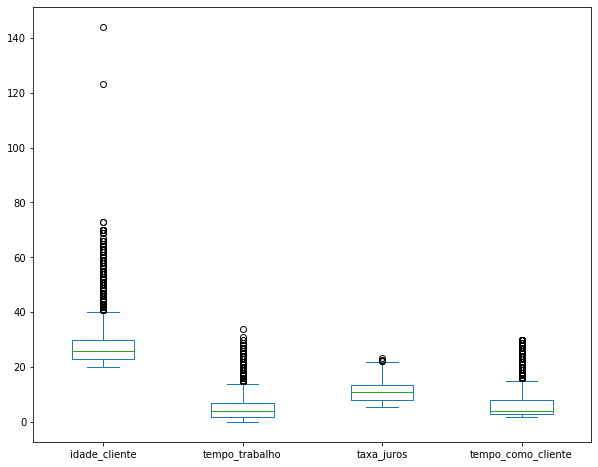

In [44]:
ax = df_fill[['idade_cliente', 'tempo_trabalho', 'taxa_juros', 'tempo_como_cliente']].plot.box(figsize=(10, 8))

ax

<AxesSubplot:>

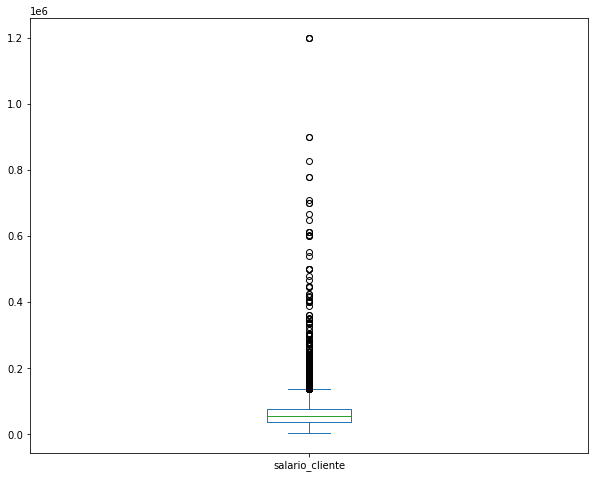

In [46]:
ax = df_fill[['salario_cliente']].plot.box(figsize=(10, 8))

ax

In [59]:
print('O valor máximo de salário anual é de: ', df_fill.salario_cliente.max())
print('O valor mínimo de salário anual é de: ', df_fill.salario_cliente.min())

O valor máximo de salário anual é de:  1200000.0
O valor mínimo de salário anual é de:  4000.0


In [58]:
df_fill.salario_cliente.value_counts(bins = 10)

(2803.999, 123600.0]      13917
(123600.0, 243200.0]        924
(243200.0, 362800.0]         71
(362800.0, 482400.0]         15
(602000.0, 721600.0]          9
(482400.0, 602000.0]          8
(721600.0, 841200.0]          3
(1080400.0, 1200000.0]        3
(841200.0, 960800.0]          2
(960800.0, 1080400.0]         0
Name: salario_cliente, dtype: int64

In [65]:
df_fill['salario_mensal'] = round(df_fill.salario_cliente/12, ndigits=2)
df_fill.head()

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,salario_mensal,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,4000.00,alugado,17.0,quitar,B,3500.0,11.86,0.07,10,0,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,4250.00,alugado,6.0,pessoal,A,7500.0,5.99,0.15,2,0,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,7083.33,alugado,2.0,saude,B,9600.0,10.99,0.11,4,0,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,7167.00,alugado,0.0,ensino,C,12000.0,12.99,0.14,2,0,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,4166.67,alugado,5.0,risco,B,12000.0,10.37,0.24,9,0,0.0


In [63]:
df_fill.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'tipo_propriedade', 'tempo_trabalho',
       'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
       'taxa_juros', 'salario_emprestimo', 'tempo_como_cliente',
       'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA', 'salario_mensal'],
      dtype='object')

In [64]:
df_fill = df_fill[['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'salario_mensal', 'tipo_propriedade', 'tempo_trabalho',
       'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
       'taxa_juros', 'salario_emprestimo', 'tempo_como_cliente',
       'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA']]
df_fill.head()

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,salario_mensal,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.0,48000.0,4000.0,alugado,17.0,quitar,B,3500.0,11.86,0.07,10,0,0.0
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.0,51000.0,4250.0,alugado,6.0,pessoal,A,7500.0,5.99,0.15,2,0,0.0
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.0,85000.0,7083.0,alugado,2.0,saude,B,9600.0,10.99,0.11,4,0,0.0
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.0,86004.0,7167.0,alugado,0.0,ensino,C,12000.0,12.99,0.14,2,0,0.0
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.0,50000.0,4167.0,alugado,5.0,risco,B,12000.0,10.37,0.24,9,0,0.0


In [68]:
df_fill.query('salario_cliente < 12000')

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,salario_mensal,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
253,cc3wv8uE-fRxD,xjqEnye2-0mE0,CoBbS8rp-fkxK,30.0,10800.0,900.00,proprio,6.0,ensino,B,2400.0,9.99,0.22,7,0,1.0
499,x8ovO8cg-Yhgg,x8v512L7-ET4m,v8W6fnE7-HWxY,30.0,9600.0,800.00,alugado,5.0,pessoal,A,1800.0,5.99,0.19,8,0,1.0
723,3fp0y0wm-dsd7,oNZPEl7K-A3H1,clqzFZaR-h2RC,22.0,10000.0,833.33,alugado,0.0,reforma,D,1000.0,14.74,0.10,4,0,1.0
829,a2U9O3J3-iED8,Xt9cZ8so-uAvY,KeM0kc3u-Qs24,24.0,10000.0,833.33,alugado,8.0,pessoal,A,3000.0,7.90,0.30,3,0,1.0
1323,AN0Tv8Sl-Jdw9,K35HQxvr-EgfQ,050HN82m-mgF4,24.0,9600.0,800.00,alugado,3.0,ensino,C,1300.0,12.73,0.14,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14329,oi6lMoEq-vIs0,qALgXMa1-gwUL,NcQrzKQf-ib1j,24.0,7500.0,625.00,alugado,0.0,reforma,C,1200.0,13.48,0.16,4,0,1.0
14334,qgK0KB3P-WmwJ,ZknL0qKb-3TBO,wlTJPECF-zq2w,29.0,8500.0,708.33,alugado,7.0,risco,A,4500.0,8.63,0.53,10,0,1.0
14591,wLAYCLnd-oxRZ,9Uzw28UW-iZwS,jvNYe4as-BaRM,28.0,11029.0,919.08,financiado,12.0,saude,C,2150.0,10.78,0.19,7,1,1.0
14644,SIUk21sE-NPmN,fJRR5kcv-qtf6,4U6W6jib-Q02W,27.0,10400.0,866.67,proprio,10.0,pessoal,C,4750.0,14.72,0.46,7,1,1.0


<AxesSubplot:>

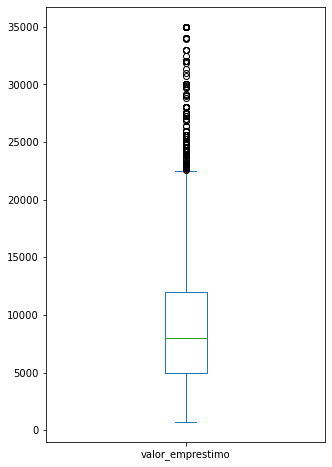

In [66]:
ax = df_fill[['valor_emprestimo']].plot.box(figsize=(5, 8))

ax

<AxesSubplot:>

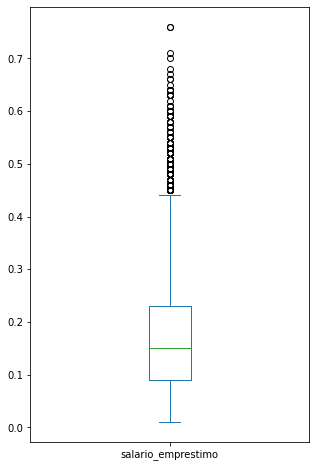

In [67]:
ax = df_fill[['salario_emprestimo']].plot.box(figsize=(5, 8))

ax

In [69]:
clientes_com_metade_do_salario_comprometido = df_fill.query('salario_emprestimo >= 0.5')
clientes_com_metade_do_salario_comprometido

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,salario_mensal,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
32,n5kjPGXc-X26m,H23kjItw-57a4,UA80ezoL-9F94,28.0,22188.0,1849.00,alugado,9.0,ensino,A,11500.0,8.49,0.52,5,0,1.0
55,HbrydfnA-9ICw,FFlqdskU-IB8N,Xd1j7BSM-wXP7,31.0,37000.0,3083.33,financiado,12.0,quitar,C,22000.0,12.73,0.59,7,1,0.0
105,UJdC5KZu-plFs,BnaYytrJ-t7HD,K167S7O2-Fl8c,36.0,42000.0,3500.00,alugado,1.0,ensino,A,21000.0,7.49,0.50,11,0,1.0
183,4fqKD49g-EnlT,19BqPfko-UhfZ,3Qr6Sxv1-rG97,27.0,48000.0,4000.00,alugado,2.0,pessoal,C,25000.0,10.59,0.52,7,0,1.0
267,jb2LEXLe-Jrjd,WmXvzSfk-pjXi,j60q3pRe-076L,26.0,29040.0,2420.00,alugado,2.0,ensino,B,15000.0,9.62,0.52,4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,5TNrr0MM-T2pY,eUSJUcPc-e8Fx,CBGDZfxs-IDiK,25.0,34000.0,2833.33,alugado,10.0,quitar,B,20000.0,8.88,0.59,2,0,1.0
14730,IvrpevYo-Uuse,Wsj7i6Bh-GHaS,h2G0dBy0-mtwO,24.0,30000.0,2500.00,proprio,1.0,saude,E,15000.0,15.68,0.50,3,0,1.0
14747,spHNAPh3-1fBf,Hy5Oig5I-Xxcm,Xwkn4yrq-ZT3T,21.0,36000.0,3000.00,alugado,5.0,saude,D,20000.0,10.37,0.56,2,1,1.0
14829,GkRrBNbg-ivNl,BtcfZml6-s1mt,inKIHW3p-7kcR,21.0,42500.0,3541.67,alugado,3.0,ensino,C,25000.0,12.73,0.59,3,1,1.0


In [70]:
df_fill.POSSIBILIDADE_INADIMPLENCIA.value_counts()

0.0    11656
1.0     3296
Name: POSSIBILIDADE_INADIMPLENCIA, dtype: int64

In [72]:
df_fill.INADIMPLENTE.value_counts()

0    12335
1     2617
Name: INADIMPLENTE, dtype: int64

In [71]:
clientes_com_metade_do_salario_comprometido.POSSIBILIDADE_INADIMPLENCIA.value_counts()

1.0    113
0.0     34
Name: POSSIBILIDADE_INADIMPLENCIA, dtype: int64

In [73]:
clientes_com_metade_do_salario_comprometido.INADIMPLENTE.value_counts()

0    115
1     32
Name: INADIMPLENTE, dtype: int64

In [47]:
df_fill.query('idade_cliente >= 44')

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
47,8b5caH2B-xpiM,FmGcdv7M-ZIg8,pYQuQ7Cz-IAJh,46.0,80000.0,financiado,8.0,risco,B,5000.0,11.86,0.06,15,0,0.0
71,lwqlaSe9-hAYR,mW9tPtGN-hla1,ZgnE56yN-0X4S,56.0,90000.0,financiado,0.0,pessoal,A,7200.0,6.17,0.08,19,0,0.0
89,Op9wORK6-A3Yb,UbMs4SBi-jsQQ,9IDtTDHK-wPXd,64.0,56000.0,alugado,0.0,quitar,E,10000.0,16.82,0.18,18,1,1.0
114,DPxYM55y-FcCU,mo0Oz4l8-phqw,2u346UE7-6ryr,53.0,85000.0,alugado,2.0,pessoal,A,8000.0,7.74,0.09,26,0,0.0
233,7i2bfQx4-YdqH,Z6la1u7B-gPvE,AqM6k5QO-ar5n,44.0,26500.0,financiado,5.0,quitar,A,6200.0,6.03,0.23,16,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,HW9Cyzhg-7xpb,KNEvnXKG-JeuS,gEzUkEk8-rZL8,58.0,33600.0,alugado,6.0,ensino,C,1500.0,14.79,0.04,28,0,0.0
14737,lLqWwPkd-hEDZ,UHLgqrUX-mEIZ,8trnfp2P-9g4y,44.0,119000.0,alugado,0.0,quitar,A,5900.0,6.17,0.05,14,0,0.0
14796,jCedK5F6-EsSc,mZMozYNl-7UqP,9S4hm3Yn-uzrM,53.0,304800.0,alugado,6.0,risco,B,5000.0,8.88,0.02,29,0,0.0
14849,Ppkd66Sv-7ElZ,jHsfQ00W-bR1Z,fMurZNSO-fAQb,48.0,71004.0,alugado,5.0,pessoal,B,16000.0,9.25,0.23,17,0,0.0


<AxesSubplot:>

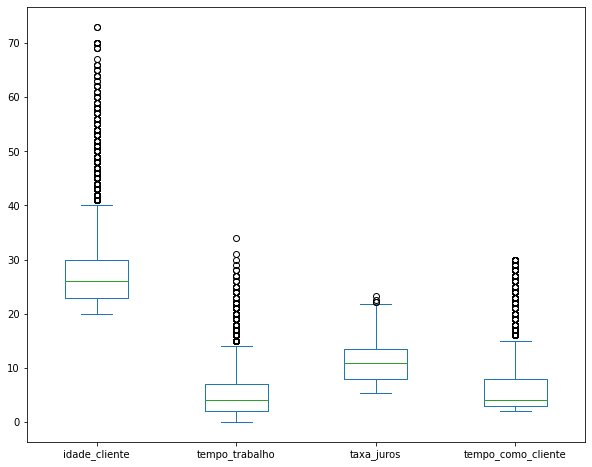

In [53]:
df_fill['idade_cliente'] = df_fill['idade_cliente'].replace([123, 144],[23, 44])
ax = df_fill[['idade_cliente', 'tempo_trabalho', 'taxa_juros', 'tempo_como_cliente']].plot.box(figsize=(10, 8))
ax

In [74]:
df_fill.idade_cliente.max()

73.0

In [75]:
df_fill.query('idade_cliente > 44')

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,salario_mensal,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
47,8b5caH2B-xpiM,FmGcdv7M-ZIg8,pYQuQ7Cz-IAJh,46.0,80000.0,6666.67,financiado,8.0,risco,B,5000.0,11.86,0.06,15,0,0.0
71,lwqlaSe9-hAYR,mW9tPtGN-hla1,ZgnE56yN-0X4S,56.0,90000.0,7500.00,financiado,0.0,pessoal,A,7200.0,6.17,0.08,19,0,0.0
89,Op9wORK6-A3Yb,UbMs4SBi-jsQQ,9IDtTDHK-wPXd,64.0,56000.0,4666.67,alugado,0.0,quitar,E,10000.0,16.82,0.18,18,1,1.0
114,DPxYM55y-FcCU,mo0Oz4l8-phqw,2u346UE7-6ryr,53.0,85000.0,7083.33,alugado,2.0,pessoal,A,8000.0,7.74,0.09,26,0,0.0
261,EvWNLN40-xwp7,JFmaSQYR-ETUK,RoePkP1s-yF5Q,45.0,19200.0,1600.00,alugado,1.0,risco,B,4000.0,10.00,0.21,15,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14728,1rdL14Ha-sCjO,7jj46X8x-Torl,kI4JKs0U-dD1k,50.0,41496.0,3458.00,alugado,9.0,quitar,D,5000.0,15.31,0.12,16,1,1.0
14729,HW9Cyzhg-7xpb,KNEvnXKG-JeuS,gEzUkEk8-rZL8,58.0,33600.0,2800.00,alugado,6.0,ensino,C,1500.0,14.79,0.04,28,0,0.0
14796,jCedK5F6-EsSc,mZMozYNl-7UqP,9S4hm3Yn-uzrM,53.0,304800.0,25400.00,alugado,6.0,risco,B,5000.0,8.88,0.02,29,0,0.0
14849,Ppkd66Sv-7ElZ,jHsfQ00W-bR1Z,fMurZNSO-fAQb,48.0,71004.0,5917.00,alugado,5.0,pessoal,B,16000.0,9.25,0.23,17,0,0.0


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [77]:
df_fill.head()

,id_cliente,id_emprestimo,id_historico,idade_cliente,salario_cliente,salario_mensal,tipo_propriedade,tempo_trabalho,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA
0,tad8vkTn-vp4l,TOt8c6L6-s7ik,RrDGKyTj-Klus,33.00,48000.00,4000.00,alugado,17.00,quitar,B,3500.00,11.86,0.07,10,0,0.00
1,pNnqq0Ql-mXDg,c3aDZaHQ-Yz61,jgLTv4dz-RrbJ,22.00,51000.00,4250.00,alugado,6.00,pessoal,A,7500.00,5.99,0.15,2,0,0.00
2,WvikzddB-Fzo8,NRNKsI3j-vy1N,qMi6xZcZ-7pv3,23.00,85000.00,7083.33,alugado,2.00,saude,B,9600.00,10.99,0.11,4,0,0.00
3,wQjd4F7u-P45x,Is7djrQj-6wB4,i8Gd1QLO-WyJz,26.00,86004.00,7167.00,alugado,0.00,ensino,C,12000.00,12.99,0.14,2,0,0.00
4,qlWL5n7v-00z9,M4zrvEh2-v0UC,w6OC79WL-49ZC,27.00,50000.00,4166.67,alugado,5.00,risco,B,12000.00,10.37,0.24,9,0,0.00


In [78]:
df_fill.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'idade_cliente',
       'salario_cliente', 'salario_mensal', 'tipo_propriedade',
       'tempo_trabalho', 'motivo_emprestimo', 'pontuacao_emprestimo',
       'valor_emprestimo', 'taxa_juros', 'salario_emprestimo',
       'tempo_como_cliente', 'INADIMPLENTE', 'POSSIBILIDADE_INADIMPLENCIA'],
      dtype='object')

In [83]:
df_dummies = pd.get_dummies(df_fill.drop(['id_cliente', 'id_emprestimo', 
                                          'id_historico','idade_cliente', 
                                          'salario_cliente', 'salario_mensal', 
                                          'tempo_trabalho', 'valor_emprestimo', 
                                          'taxa_juros', 'salario_emprestimo', 
                                          'tempo_como_cliente', 'INADIMPLENTE', 
                                          'POSSIBILIDADE_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_propriedade_alugado,tipo_propriedade_financiado,tipo_propriedade_outro,tipo_propriedade_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,pontuacao_emprestimo_A,pontuacao_emprestimo_B,pontuacao_emprestimo_C,pontuacao_emprestimo_D,pontuacao_emprestimo_E,pontuacao_emprestimo_F,pontuacao_emprestimo_G
0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
14948,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
14949,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
14950,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [86]:
df_modificado = df_fill[['idade_cliente',
                         'salario_cliente', 'salario_mensal', 
                         'tempo_trabalho', 'valor_emprestimo', 
                         'taxa_juros', 'salario_emprestimo', 
                         'tempo_como_cliente', 'INADIMPLENTE', 
                         'POSSIBILIDADE_INADIMPLENCIA']]

In [87]:
dados_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_final.head()

,idade_cliente,salario_cliente,salario_mensal,tempo_trabalho,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,POSSIBILIDADE_INADIMPLENCIA,tipo_propriedade_alugado,tipo_propriedade_financiado,tipo_propriedade_outro,tipo_propriedade_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,pontuacao_emprestimo_A,pontuacao_emprestimo_B,pontuacao_emprestimo_C,pontuacao_emprestimo_D,pontuacao_emprestimo_E,pontuacao_emprestimo_F,pontuacao_emprestimo_G
0,33.00,48000.00,4000.00,17.00,3500.00,11.86,0.07,10,0,0.00,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,22.00,51000.00,4250.00,6.00,7500.00,5.99,0.15,2,0,0.00,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,23.00,85000.00,7083.33,2.00,9600.00,10.99,0.11,4,0,0.00,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,26.00,86004.00,7167.00,0.00,12000.00,12.99,0.14,2,0,0.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,27.00,50000.00,4166.67,5.00,12000.00,10.37,0.24,9,0,0.00,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [88]:
X = dados_final.drop('POSSIBILIDADE_INADIMPLENCIA', axis = 1)
y = dados_final['POSSIBILIDADE_INADIMPLENCIA']

In [89]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)

In [90]:
dados_final = pd.concat([X, y], axis=1)
dados_final

,idade_cliente,salario_cliente,salario_mensal,tempo_trabalho,valor_emprestimo,taxa_juros,salario_emprestimo,tempo_como_cliente,INADIMPLENTE,tipo_propriedade_alugado,tipo_propriedade_financiado,tipo_propriedade_outro,tipo_propriedade_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,pontuacao_emprestimo_A,pontuacao_emprestimo_B,pontuacao_emprestimo_C,pontuacao_emprestimo_D,pontuacao_emprestimo_E,pontuacao_emprestimo_F,pontuacao_emprestimo_G,POSSIBILIDADE_INADIMPLENCIA
0,33.00,48000.00,4000.00,17.00,3500.00,11.86,0.07,10,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.00
1,22.00,51000.00,4250.00,6.00,7500.00,5.99,0.15,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.00
2,23.00,85000.00,7083.33,2.00,9600.00,10.99,0.11,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0.00
3,26.00,86004.00,7167.00,0.00,12000.00,12.99,0.14,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.00
4,27.00,50000.00,4166.67,5.00,12000.00,10.37,0.24,9,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,31.07,44000.00,3666.67,3.21,7120.66,12.29,0.16,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00
23308,21.07,32418.25,2701.52,1.44,10000.00,11.48,0.31,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00
23309,22.66,54000.00,4500.00,5.98,5000.00,14.04,0.09,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.00
23310,26.17,33600.00,2800.00,4.40,12000.00,10.34,0.36,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00


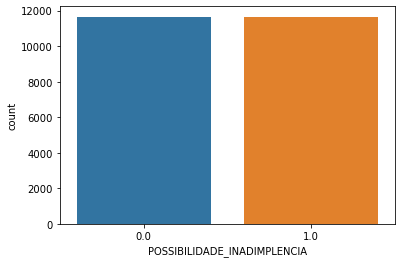

In [91]:
ax = sns.countplot(x='POSSIBILIDADE_INADIMPLENCIA', data=dados_final)

In [92]:
X = dados_final.drop('POSSIBILIDADE_INADIMPLENCIA', axis = 1)
y = dados_final['POSSIBILIDADE_INADIMPLENCIA']

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [96]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 0.90972589, -0.25561403, -0.25561404, ..., -0.14940423,
        -0.07102247, -0.03932757],
       [-0.9741796 , -0.19004933, -0.19004934, ..., -0.14940423,
        -0.07102247, -0.03932757],
       [-0.80291547,  0.55301724,  0.55301636, ..., -0.14940423,
        -0.07102247, -0.03932757],
       ...,
       [-0.86124731, -0.12448463, -0.12448465, ..., -0.14940423,
        -0.07102247, -0.03932757],
       [-0.26078755, -0.57032457, -0.57032459, ..., -0.14940423,
        -0.07102247, -0.03932757],
       [-0.04197606, -0.12448463, -0.12448465, ..., -0.14940423,
        -0.07102247, -0.03932757]])

In [97]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123, stratify = y)

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier()

In [100]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier()

In [101]:
predito_knn = knn.predict(X_teste)

In [102]:
predito_knn

array([0., 1., 1., ..., 0., 1., 1.])

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
print(confusion_matrix(y_teste, predito_knn))

[[3353  144]
 [ 413 3084]]


In [105]:
from sklearn.metrics import accuracy_score

In [106]:
print(accuracy_score(y_teste, predito_knn))

0.9203603088361453


In [107]:
from sklearn.metrics import precision_score

In [108]:
print(precision_score(y_teste, predito_knn))

0.9553903345724907


In [109]:
from sklearn.metrics import recall_score

In [110]:
print(recall_score(y_teste, predito_knn))

0.8818987703746068


In [111]:
np.median(X_treino)

-0.3452662674363792

In [112]:
from sklearn.naive_bayes import BernoulliNB

In [113]:
bnb = BernoulliNB(binarize=-0.3452662674363792)

In [114]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.3452662674363792)

In [115]:
predito_BNb = bnb.predict(X_teste)

In [116]:
predito_BNb

array([0., 1., 1., ..., 0., 0., 1.])

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight = 'balanced')

In [119]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [120]:
dtc.feature_importances_

array([0.02756541, 0.04481397, 0.07585126, 0.03606405, 0.04099976,
       0.0483257 , 0.16582999, 0.0202635 , 0.00408853, 0.01211077,
       0.05069882, 0.00137626, 0.03872657, 0.00889715, 0.00944209,
       0.00551125, 0.0130735 , 0.01624632, 0.00644685, 0.08738903,
       0.10683308, 0.12389419, 0.02831278, 0.01835264, 0.00845821,
       0.00042832])

In [121]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [122]:
predito_ArvoreDecisao

array([0., 1., 1., ..., 0., 1., 1.])

In [123]:
print(confusion_matrix(y_teste, predito_BNb))

[[2733  764]
 [ 667 2830]]


In [124]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[3169  328]
 [ 321 3176]]


In [125]:
print(accuracy_score(y_teste, predito_BNb))

0.795396053760366


In [126]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.9072061767229054


In [127]:
print(precision_score(y_teste, predito_BNb))

0.7874234835837507


In [128]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.906392694063927


In [129]:
print(recall_score(y_teste, predito_BNb))

0.8092650843580211


In [130]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.9082070346010866


In [131]:
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.9553903345724907
Modelo Bernoulli de Naive Bayes:  0.7874234835837507
Modelo Árvore de Decisão:  0.906392694063927


In [132]:
dados_totais.to_csv('dados_totais.csv', index = False)
df.to_csv('df.csv', index = False)
df_fill.to_csv('df_fill.csv', index = False)